# Исследование Gofast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках.   
  
Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  
  
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8
8 рублей;
стоимость старта (начала поездки) — 
50
50 рублей;  
  
с подпиской Ultra
абонентская плата — 
199
199 рублей в месяц;
стоимость одной минуты поездки — 
6
6 рублей;
стоимость старта — бесплатно.  

  
  
  Данные представлены в трех таблицах с описанием каждого пользователя, описание каждой поездки и описанием типа подписки.  
    
  План работ:       
  Шаг 1. Загрузка данных  
  Шаг 2. Предобработка данных  
  Шаг 3. Исследовательский анализ данных  
  Шаг 4. Объединение данных  
  Шаг 5. Подсчёт выручки  
  Шаг 6. Проверка гипотез  
  Вывод

In [1]:
import pandas
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
data_users = pandas.read_csv('/datasets/users_go.csv', sep=',')
data_rides = pandas.read_csv('/datasets/rides_go.csv')
data_sub = pandas.read_csv('/datasets/subscriptions_go.csv')

In [3]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [5]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
data_sub.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Вывод 1.4  
Проведя первичное изучение данных, можно сказать, что данных более чем достаточно для проведения иследования. В данных хватает есть ошибки и дубликаты, которые необходимо устранить для успешой выполнении работы.

#### Шаг 2. Предобработка данных

In [9]:
print(data_users.isna().sum())
print(data_rides.isna().sum())
print(data_sub.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропусков в данных не обнаруженно, все названия столбцов введены корректно 

In [10]:
#Удалим дублиты
data_users = data_users.drop_duplicates()
data_rides = data_rides.drop_duplicates()
data_sub = data_sub.drop_duplicates()

In [11]:
#Приведем данные столбца date к правильному типу данных
data_rides['date'] = pandas.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 705.8 KB


In [12]:
#Добавим новый столбец, в которов будут месяцы
data_rides['month'] = data_rides['date'].dt.month
data_rides['month']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month, Length: 18068, dtype: int64

Вывод    
  В процессе предварительной обработки данных были выявлены явные дубликаты, изменен тип данных в столбце с датой. Повтовряющие значения в данных скорее всего вызваны техническими ошибками. 

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object


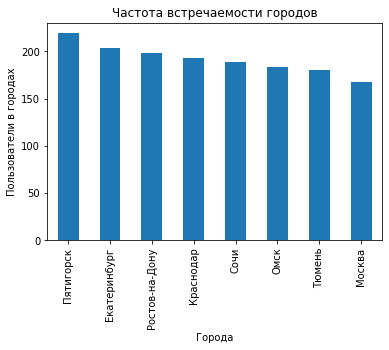

In [13]:
data_users['city'].value_counts().plot(kind='bar')
print(data_users['city'].describe())
plt.title("Частота встречаемости городов")
plt.ylabel("Пользователи в городах")
plt.xlabel("Города")
None

Из графика видно, что больше всего пользователей из Пятигорска, а меньше всего из Москвы

##### Соотношение пользователей с подпиской и без подписки

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object


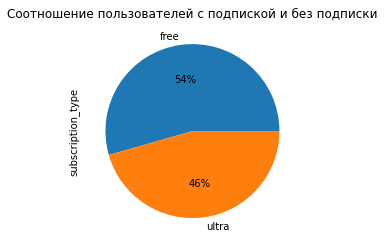

In [14]:
data_users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')
print(data_users['subscription_type'].describe())
plt.title("Соотношение пользователей с подпиской и без подписки")
None

Как видно из графика, людей с подпиской и без примерно поровну, хотя тех кто пользуется приложением бесплатно - немного больше.

##### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


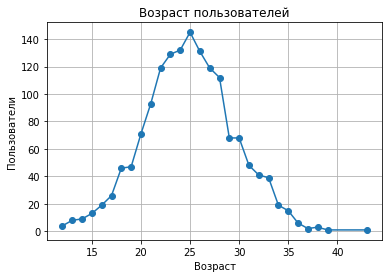

In [15]:
data_users.groupby(['age']).count()['user_id'].plot(marker='o', grid=True)
print(data_users['age'].describe())
plt.title("Возраст пользователей")
plt.ylabel("Пользователи")
plt.xlabel("Возраст")
None

Распределение графика похоже на нормальное, что говорит о его доставерности. Видно, что наиболее вероятный возраст пользователя находится на отметке примерно в 25 лет

##### Расстояние

Диаграмма показала, что в данных присутсвуют выбросы, от которых лучше избавиться

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


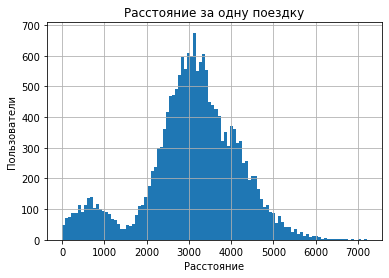

In [16]:
data_rides['distance'].hist(bins=100)
print(data_rides['distance'].describe())
plt.title("Расстояние за одну поездку")
plt.ylabel("Пользователи")
plt.xlabel("Расстояние")
None

Распределение графика походит на нормальное с главным пиком в 3000м и небольшим пиком в области 600м. Небольшие расстояние 1000-2000м пользаватели чаще проходят ногами. Вероятно это связано с тем что люди не видят необходимости брать самокаты на такие короткие расстояния, а небольшой пик в начале, вероятно вызван теми людьми, которые берут самокат когда очень спешат.

##### Длительность поездки

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


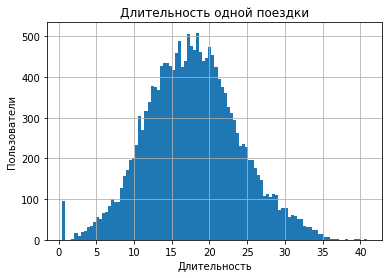

In [17]:
data_rides['duration'].hist(bins=100)
print(data_rides['duration'].describe())
plt.title("Длительность одной поездки")
plt.ylabel("Пользователи")
plt.xlabel("Длительность")
None

График похож на нормальное распределение что говорит о его достоверности. Я ожидал что он будет похож на график из предыдущего пункта, однако это не так, и у графика длительности поездки только один пик

##### Вывод по Шаг 3

Исследовательский анализ данных показал, что наибольшее количество пользователей находится в Пятигорске, а наименьшее - в Москве  
  
Количество пользователей без подписки составляет большее число пользователей.  
  
Возраст пользователей доходит до 40 лет, однако больше всего пользователей находится в области 25 лет.  
  
Средняя поездка длится примерно 18 минут и за это время пользователь в среднем успевает проехать 3000 метров. Однако наблюдается небольшой пик в области до 1000 метров, который вызвал тем что у пользователей с подпиской нет ограничений на старт поездок, а значит даже короткие расстояния получатся дешево.

#### Шаг 4. Объединение данных

##### Составные таблицы


In [18]:
#Размерность исходных датасетов
print(len(data_users), len(data_rides), len(data_sub))

1534 18068 2


In [19]:
data_merge = data_users.merge(data_rides, on='user_id').merge(data_sub, on='subscription_type')
data_merge

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [20]:
print(len(data_merge))
data_merge.isna().sum()

18068


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Размерности сопадают, пропусков не обнаружено, можно двигаться дальше

In [21]:
data_merge_ultra = data_merge.query('subscription_type == "ultra"')
data_merge_free = data_merge.query('subscription_type == "free"')

##### Длительность и дальность поездки пользователями с подпиской

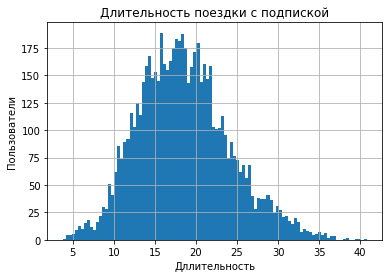

In [22]:
data_merge_ultra['duration'].hist(bins=100)
plt.title("Длительность поездки с подпиской")
plt.ylabel("Пользователи")
plt.xlabel("Дллительность")
None

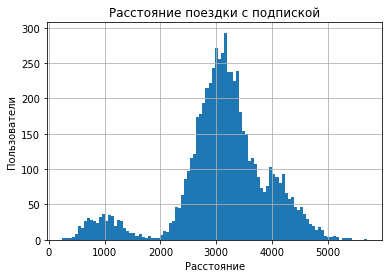

In [23]:
data_merge_ultra['distance'].hist(bins=100)
plt.title("Расстояние поездки с подпиской")
plt.ylabel("Пользователи")
plt.xlabel("Расстояние")
None

Графики длительности поездки и расстония похожи на нормальное распределение, что говорит о их достоверности. У графика расстояния поездки наблюдается небольшой необычный пик в районе 1000м

##### Длительность и дальность поездки пользователями без подписки

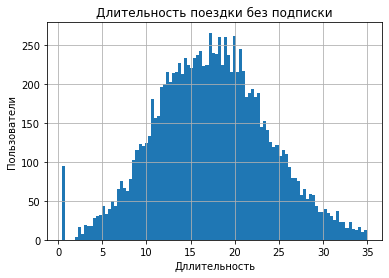

In [24]:
data_merge_free['duration'].hist(bins=100)
plt.title("Длительность поездки без подписки")
plt.ylabel("Пользователи")
plt.xlabel("Дллительность")
None

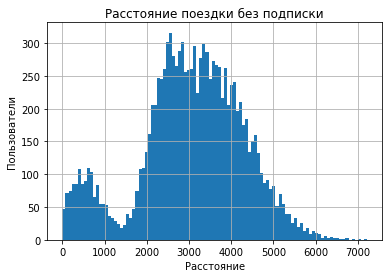

In [25]:
data_merge_free['distance'].hist(bins=100)
plt.title("Расстояние поездки без подписки")
plt.ylabel("Пользователи")
plt.xlabel("Расстояние")
None

Графики длительности поездки у обоих категорий практически совпадают. У обоих графиков наблюдается небольшой дополнительный пик в области коротких поездкок. между пиками графики распределены нормально, что может говорить об их достоверности.

#### Шаг 5. Подсчёт выручки

##### Агрегированый датафрейм

In [26]:
#Округление значений в столбце
data_merge['duration'] = data_merge['duration'].apply(lambda x: int(x + 0.5))
data_merge

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


In [27]:
data_merge_month = data_merge.pivot_table(index=['user_id', 'month', 'subscription_type'], values=['distance', 'duration'],  aggfunc=['sum', 'count'])
data_merge_month.columns = ['distance', 'duration', 'count', 'drop']
data_merge_month.drop('drop', axis= 1 , inplace= True )
data_merge_month

distance  duration  count
user_id month subscription_type                               
1       1     ultra               7027.511294        42      2
        4     ultra                754.159807         6      1
        8     ultra               6723.470560        45      2
        10    ultra               5809.911100        32      2
        11    ultra               7003.499363        53      3
...                                       ...       ...    ...
1534    6     free                3409.468534        24      2
        8     free                7622.453034        47      2
        9     free                4928.173852        23      1
        11    free               13350.015305        76      4
        12    free                2371.711192        16      1

[11331 rows x 3 columns]

In [28]:
data_merge_month['month_profit'] = data_merge_month['count']
data_merge_month

distance  duration  count  month_profit
user_id month subscription_type                                             
1       1     ultra               7027.511294        42      2             2
        4     ultra                754.159807         6      1             1
        8     ultra               6723.470560        45      2             2
        10    ultra               5809.911100        32      2             2
        11    ultra               7003.499363        53      3             3
...                                       ...       ...    ...           ...
1534    6     free                3409.468534        24      2             2
        8     free                7622.453034        47      2             2
        9     free                4928.173852        23      1             1
        11    free               13350.015305        76      4             4
        12    free                2371.711192        16      1             1

[11331 rows x 4 columns]

In [29]:
data_merge_month = data_merge_month.reset_index()

In [30]:
for i in range(len(data_merge_month)):
    if  'ultra' in data_merge_month['subscription_type'][i] == 'ultra':
        data_merge_month['month_profit'][i] = 199 + (data_merge_month['duration'][i]*6)       
    else:
        data_merge_month['month_profit'][i] = (data_merge_month['duration'][i]*8) + (50*data_merge_month['count'][i])

/tmp/ipykernel_218/2787539168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_month['month_profit'][i] = 199 + (data_merge_month['duration'][i]*6)
/tmp/ipykernel_218/2787539168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_month['month_profit'][i] = (data_merge_month['duration'][i]*8) + (50*data_merge_month['count'][i])


In [31]:
data_merge_month

,user_id,month,subscription_type,distance,duration,count,month_profit
0,1,1,ultra,7027.511294,42,2,451
1,1,4,ultra,754.159807,6,1,235
2,1,8,ultra,6723.470560,45,2,469
3,1,10,ultra,5809.911100,32,2,391
4,1,11,ultra,7003.499363,53,3,517
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,24,2,292
11327,1534,8,free,7622.453034,47,2,476
11328,1534,9,free,4928.173852,23,1,234
11329,1534,11,free,13350.015305,76,4,808


In [32]:
data_merge_month.isna().sum()

user_id              0
month                0
subscription_type    0
distance             0
duration             0
count                0
month_profit         0
dtype: int64

Пропусков нет, таблица заполнена корректно

#### Шаг 6. Проверка гипотез

##### Нулевая гипотеза: Средняя длительность поездки пользователей двух групп равны. Альтернативная гипотеза: Пользователи с подпиской тратят больше времени



count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


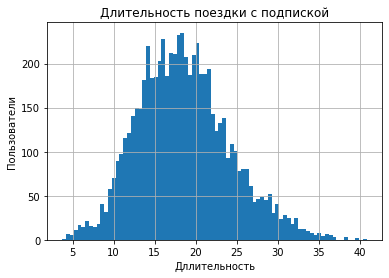

In [33]:
data_merge_ultra['duration'].hist(bins=80)
print(data_merge_ultra['duration'].describe())
plt.title("Длительность поездки с подпиской")
plt.ylabel("Пользователи")
plt.xlabel("Дллительность")
None

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


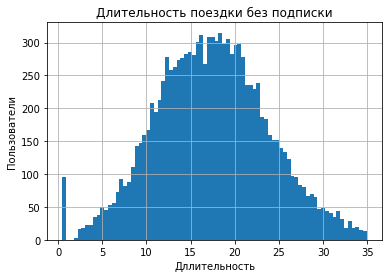

In [34]:
data_merge_free['duration'].hist(bins=80)
print(data_merge_free['duration'].describe())
plt.title("Длительность поездки без подписки")
plt.ylabel("Пользователи")
plt.xlabel("Дллительность")
None

In [35]:
results = st.ttest_ind(data_merge_ultra['duration'], data_merge_free['duration'], alternative='greater')
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.

##### Нулевая гипотеза: Пользователи с подпиской в среднем проезжают 3130 метров за поездку. Альтернативная гипотеза: Они проезжают меньше 3130 метров

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


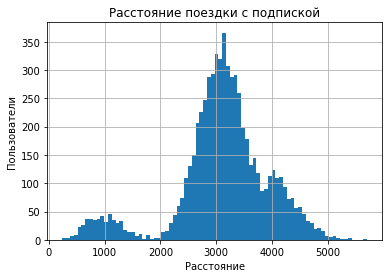

In [36]:
data_merge_ultra['distance'].hist(bins=80)
print(data_merge_ultra['distance'].describe())
plt.title("Расстояние поездки с подпиской")
plt.ylabel("Пользователи")
plt.xlabel("Расстояние")
None

In [37]:
optimal_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    data_merge_ultra['distance'], 
    optimal_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Значение pvalue выше уровня статистической значимости, а значит нулевую гипотезу отвергнуть не получилось

##### Нулевая гипотеза: Средняя помесячная вурычку пользователей двух групп равны. Альтернативная гипотеза: Пользователи с подпиской тратят больше денег в месяц

count    4533.000000
mean      358.589676
std        86.467087
min       223.000000
25%       295.000000
50%       331.000000
75%       403.000000
max       937.000000
Name: month_profit, dtype: float64


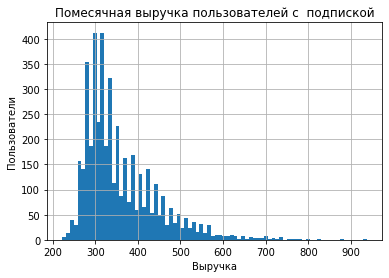

In [38]:
data_merge_month_ultra = data_merge_month.query('subscription_type == "ultra"')
print(data_merge_month_ultra['month_profit'].describe())
data_merge_month_ultra['month_profit'].hist(bins=80)
plt.title("Помесячная выручка пользователей с  подпиской")
plt.ylabel("Пользователи")
plt.xlabel("Выручка")
None

count    6798.000000
mean      321.865254
std       180.597448
min        58.000000
25%       186.000000
50%       266.000000
75%       420.000000
max      1428.000000
Name: month_profit, dtype: float64


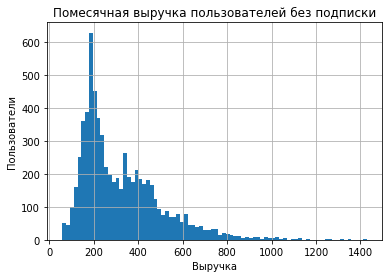

In [39]:
data_merge_month_free = data_merge_month.query('subscription_type == "free"')
print(data_merge_month_free['month_profit'].describe())
data_merge_month_free['month_profit'].hist(bins=80)
plt.title("Помесячная выручка пользователей без подписки")
plt.ylabel("Пользователи")
plt.xlabel("Выручка")
None

In [40]:
results = st.ttest_ind(data_merge_month_ultra['month_profit'], data_merge_month_free['month_profit'], alternative='greater')
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.7619013746589185e-37
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в ежемесячно приносят больший доход. Это сходит с проверяемой ранее теорией о том, что пользователи с подпиской приносят больше денег.

##### Нулевая гипотеза: Количество обращений не изменилось, несмотря на обновление приложения. Альтернативная гипотеза: Количество обращений снизилось

Во всех предыдущих проверках гипотез мы работали с независимыми выборками, в отличие от этого. Поэтому в данном случае я прибегну к методу st.ttesl_rel()

##### Вывод по Шаг 6

Проверки гипотез показали что:    
  Пользователи с подпиской тратят больше времени в поезках, чем пользователи без подписки в среднем  
    Пользователи с подпиской проезжают 3130 метров за поездку в среднем  
    Пользователи с подпиской тратят больше денег в месяц чем пользователи без подписки в среднем  

#### Шаг 7. Распределения

К сожалению не успеваю выполнить этот пункт, обязательно вернусь к нему позже, если успею до дедлайна(((

#### Вывод

В процессе предварительной обработки данных были выявлены явные дубликаты, изменен тип данных в столбце с датой, а также на основе его был добавлен новый столбец. Повтовряющие значения в данных скорее всего вызваны техническими ошибками.  
  
Был проведен исследовательский анализ данных, были изучены и сделаны выводы по следующим параметрам: частота встречаемости городов, соотношение пользователей с подпиской и без, возраст пользователей, расстояние за одну поездку, длительность одной поездки.  
  
Исследовательский анализ данных показал, что наибольшее количество пользователей находится в Пятигорске, а наименьшее - в Москве  
  
Количество пользователей без подписки составляет большее число пользователей.  
  
Возраст пользователей доходит до 40 лет, однако больше всего пользователей находится в области 25 лет.  
  
Средняя поездка длится примерно 18 минут и за это время пользователь в среднем успевает проехать 3000 метров. Однако наблюдается небольшой пик в области до 1000 метров, который вызвал тем что у пользователей с подпиской нет ограничений на старт поездок, а значит даже короткие расстояния получатся дешево.  
  
Была проведена работа по расчету ежемесячной выручки для каждого пользователя с подпиской и без. соответсвующий столбец был добавлен в актуальный датафрейм.  
  
  Были проверены следующие гипотезы: Средняя длительность поездки пользователей двух групп равны, Пользователи с подпиской в среднем проезжают 3130 метров за поездку, Средняя помесячная вурычку пользователей двух групп равны.  
  
  Проверки гипотез показали что:    
  Пользователи с подпиской тратят больше времени в поезках, чем пользователи без подписки в среднем  
    Пользователи с подпиской проезжают 3130 метров за поездку в среднем  
    Пользователи с подпиской тратят больше денег в месяц чем пользователи без подписки в среднем 